
# Optimisation of Interferometry Lines of Sight for Future Nuclear Fusion Experiments with the Bayesian Experimental Design Framework 

Daniel Jordan, Jake Jackson

 
### Abstract:
<div style="text-align: justify; padding: 20px"> 
Bayesian experimental design has been implimented for interferometry on a simplified model of the plasma within a tokamak. The expected utility (information gain) was found to be constant for most orientations of the laser through the plasma. At the very edge there is less information gain. More information is shown to be gained when the experimental accuracy is reduced.
</div>

#### Key words: Bayesian Experimental Design, Nuclear Fusion
----
#### Collaboration between
<center>
<img src="attachment:/imagesimage-2.png" width="600"/>
</center>


![alt text](https://github.com/jjackson1994/Bayesian_Experimental_Design_for_Fusion/blob/main/images/astat_banner.png?raw=true)

---
## Contents 

* [Section 1: Introduction](#intro)
* [Section 2: Methodology](#method)
  * [Building the model in R](#R)
  * [Plotting the model on a single Line](#line)
* [Section 3: Bayesian Experimental Design](#design)  
  * [Expected Utility for diffrent angles](#EU)
  * [Expected Utility for diffrent errors](#EU_error)
* [Section 4: Conclusion](#design)  


<a id="intro"></a>
## Section 1: Introduction

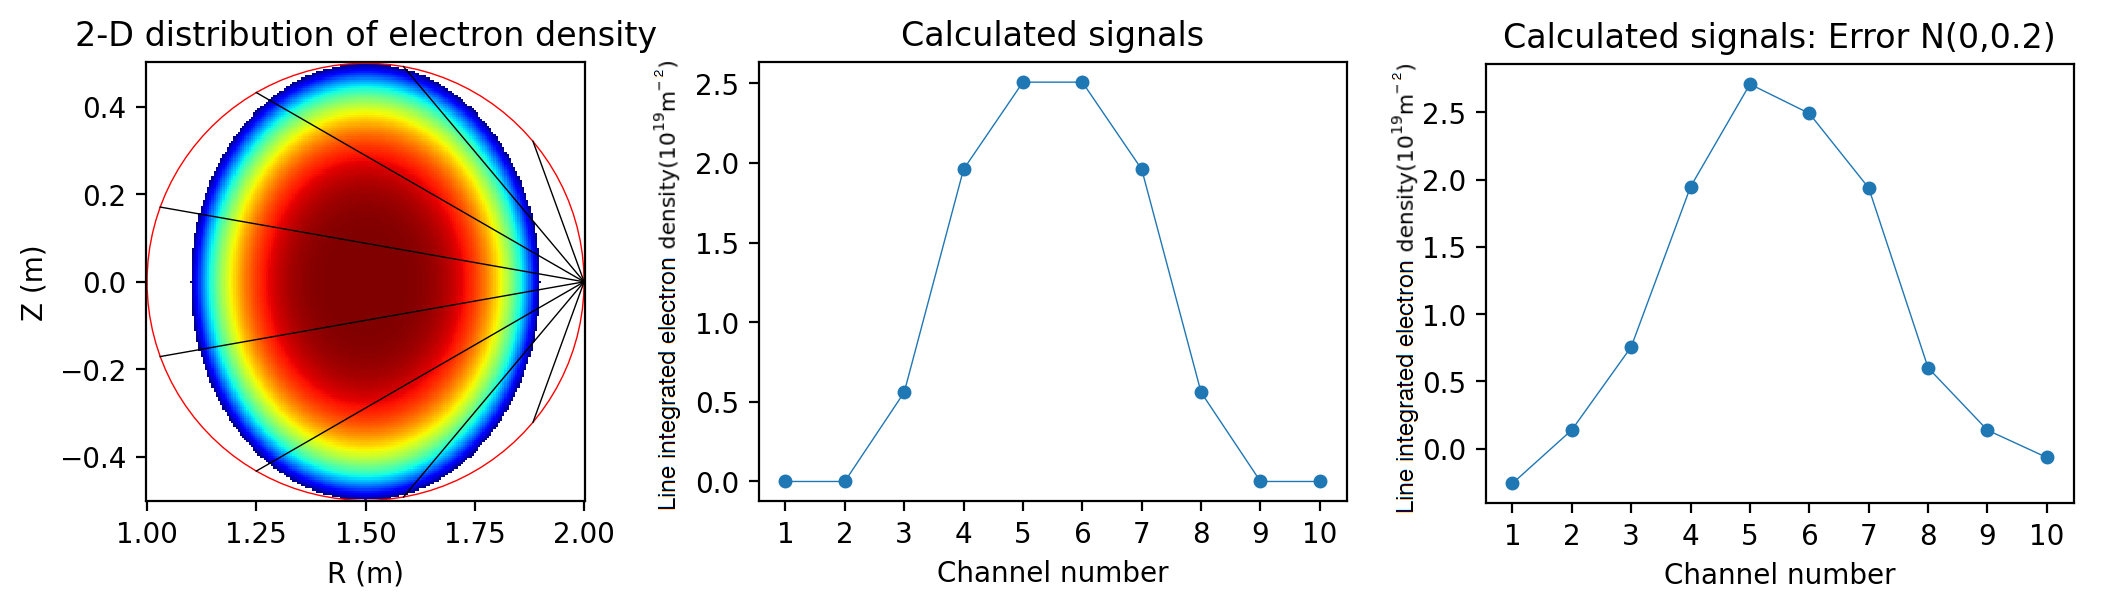
Figure 1: The left diagram shows cross sectional electron densities of a model plasma body. The right shows the true line integrated electron densities, $\phi_T$ for each line of sight.   

Bayesian experimental design is a process for quantifying the information gained from an experiment with specific design parameters. Possible design parameters have a very large scope. In an experiment which measures the temperature of a chicken a design parameter could be the depth of the probe, thickness of the probe or the number of probes. In this investigation the design parameters will be the position of the line of sight of an interferometry laser that traverses a plasma body. Bayesian experimental design uses a function known as the expected utility function which aims to quantify the amount of information that could be gained with specific design parameters. First this paper will further detail the bayesian experimental design framework in a general sense. Then an overview will be given on some specifics of interferometry and the tools available for this analysis. The general concepts of bayesian experimental design is then applied to the specific experiment under investigation. The methodology will explain in detail how the expected utility function will be evaluated.

Bayesian experimental design requires a model of the experiment. The true values of the physical parameters of interest are exactly known for the model. This allows different experiments to be trialed with different design parameters. The ability of the experiment to accurately and precisely measure the true values is dependant on the experimental error. When more measurements are taken the effect of any random error is reduced. Although with a poor experimental design repeated measurements will not help. For example if a temperature probe is inserted into the leg of the chicken, repeated measurements will never give you more insight into the temperature of the whole chicken. There is a limit to the information that can be gained dependant on the design parameters. The goal is to assess the potential for information gain on a set of design parameters. One way to asses the information gained is by comparing the information possessed prior to running the experiment and to the information possessed after collecting data. If the experimental parameter of interest is denoted as $\phi$, the data collected $D$ and the design parameters $\eta$ then we can try and formulate this idea. We can have a probability distribution $P(\phi)$ which represents the probability of $\phi$ being the true value as a function of $\phi$. It represents the prior knowledge of $\phi$ before the experiment. Then $P(\phi|D,\eta)$ is a similar distribution for our knowledge of $\phi$ after data has been taken using specific design parameters. The difference between these two distributions can express the information gained from the experiment. Kullback-Leiber divergence is a mathematical formulation that quantifies the difference between two distributions. It measures the probability that samples from one distribution could be sampled from the other distribution. If it is likely then the K-L divergence is low. Two distributions with a K-L divergence of 0 are said to be the same distribution. The higher the K-L divergence the more different the distributions are, there is no max K-L divergence. The K-L divergence for the prior and posterior distributions can be expressed as,
$$
\begin{equation}
    \label{eq:utility}
    U_{KL}(D,\eta) = \int d\phi \hspace{2mm} P(\phi|D,\eta) \hspace{2mm} log\left( \frac{P(\phi|D,\eta)}{P(\phi)} \right).
\end{equation}
$$
In experimental design, the function that is used to quantify the value of an experiment is known as the utility function. In bayesian experimental design the K-L divergence between the posterior and prior distribution is commonly used as the utility function. This can be used to compare one experiment to another where different data is taken and different design parameters are used. The design parameters are of more interest than the data. The expectation of the utility function over the possible range of data values caters for this need. It computes the expected information gain over all possible data values that can be measured and thus removes the data as a variable. 
$$
\begin{equation}
    EU_{KL}(\eta) = \int dD \hspace{2mm} P(D|\eta) \hspace{2mm} U_{KL}(D,\eta)
\end{equation}
$$
Bayesian experimental design can be summarised as the evaluation of the expected utility function for different design parameters on a model experiment in order to find the maximum. The experiment with the maximum expected utility function has the most potential for the most information gain. This also assumes that the model used is similar to reality. Specifically for the physical quantities being measured and the experimental error assigned.



The goal of this investigation is to design an interferometry experiment that gains the most information about the plasma density profile of a plasma body. Within interferometry the phase shift of the laser after traversing a plasma body is measured. This phase shift is directly proportional to the line integrated electron density along the line of sight. It is possible to show this using an understanding of maxwell's equations and plasma physics. It is possible to reconstruct the plasma density profile along the laser line from the line integrated electron density. This is outside the scope of this project. This investigation focuses on line integrated electron densities computed in a simulation for the cross section of a plasma body. The electron densities within the cross section of a tokamak will have lines of equal density that follow the shape of the poloidal magnetic field lines. Which can be simplified to follow an elliptical shape. For this reason the electron densities have been modeled as shown in the left of figure \ref{fig:simNoEr}. This is a simplified model as this investigation aims to outline the framework for bayesian experimental design. The middle of figure \ref{fig:simNoEr} shows the true line integrated density for different lines of sight. Some noise which follows a gaussian has been added in figure \ref{fig:simEr} to simulate an experimental error. The experimental error is a fundamentally important aspect of bayesian design analysis. A python version of this model has been generously provided by Hao Wu of Ghent university. A part of the model required for the analysis has been ported into R code.

In this investigation the experiment has only one interferometry laser which can have one of many possible orientations. The orientation of this line through the plasma body is represented by $\eta$. Thus the goal is to infer how much information is gained along the line of sight of a single laser. The physical property being investigated is the true line integrated electron density $\phi$, along the line of sight of the laser. The experimental data $D$ refers to measured line integrated electron densities. All that is left is to specify how the expected utility function will be evaluated.

----

<a id="method"></a>
## Methodology 

The utility function $U_{KL}(D,\eta)$ measures the information gain from our prior knowledge of the density profile $\eta$ and the knowledge we gained after measuring some data $D$. In experimental design the goal is to find the best design parameters $\eta$ regardless of the data that is measured. For this reason the expected utility function is evaluated.

Using monte carlo integration this can be evaluated by sampling n possible data values $D_j$ for the particular line of sight $\eta$, and placing them in the following expression. In other words this means to sample the $D_j$'s from the $P(D|\eta)$ distribution.

\begin{equation}
    EU_{KL}(\eta) \approx \frac{1}{n}  \sum_{j=1}^n \hspace{2mm} dD \hspace{2mm} U_{KL}(D_j,\eta)
\end{equation}

What is $P(D|\eta)$ and how can a $D_j$ be sampled from it? Assuming a fixed plasma density profile, for a given line of sight the data values that can possibly be measured is decided by the experimental error. For this investigation the experimental error is modeled as a gaussian. The a mean being the true line integrated density of the plasma profile for that line of sight. The standard deviation being small and constant for each measurement. The true $LID$ value is provided by the simulation of the plasma body. This showcases why bayesian experimental design requires a model of the parameters being measured. Sampling from a gaussian distribution is a common task that will be handeled using the core r function, rnorm(). For each $D_j$ the utility function is evaluated and the average approximates the expected utility.


The next step is to evaluate the expectation function for one sampled piece of data, $U(D_j,\eta)$. 


$$U_{KL}(D_j,\eta) = \int d\phi \hspace{2mm} P(\phi|D_j,\eta) \hspace{2mm} log\left( \frac{P(\phi|D_j,\eta)}{P(\phi)} \right).$$

This can be approximated with montecarlo integration,

$$\begin{equation}
    \label{eq:utility}
    U_{KL}(D_j,\eta) \approx \frac{1}{n} \sum_{i=1}^{n} \hspace{2mm} log\left( \frac{P(\phi_i|D_j,\eta)}{P(\phi_i)} \right).
\end{equation}$$

Where the $\phi_i$ values are sampled from the posterior $P(\phi|D_j,\eta)$. The posterior can be evaluated using bayes theorem.
$$
\begin{equation}
    P(\phi|D_j,\eta) = \frac{P(D_j|\phi,\eta)P(\phi)}{P(D_j|\eta)}
\end{equation}
$$
A uniform prior is used for $P(\phi)$. There cannot be a negative electron density and the model does not have any line integrated densities above $3\cdot10^{19}m^{-2}$. To mimic an experimentalists ignorance on the plasma density the prior is set to be uniform between values of $0$ and $6\cdot10^{19}m^{-2}$. It is zero for all other values of $\phi$. This ensures no values of $\phi$ outside this range are sampled. This controls the region of interest. To understand how first the likelihood $P(D_j|\phi,\eta)$ must be understood. This is the probability of measuring the sampled data $D_j$ given the true line integrated density is $\phi$. This is modeled as a gaussian with a mean of $\phi$ and standard deviation equal to the models experimental error. This means that if a data point is sampled with a line integrated density far above $6\cdot10^{19}m^{-2}$, no $\phi$ will be sampled in that region and the likelihood $P(D_j|\phi_i,\eta)$ is very low, which leads to a low if not zero information gain. Thus if data values are found above 6 or below 0, they do not contribute towards measured information gain. To sample $\phi_i$ from the posterior a sample can be taken from the likelihood. When using a uniform prior then main difference between the posterior and prior is normalisation. This means the probability of sampling a $\phi$ in any given range is the same for the posterior and the likelihood. Provided the range is within the prior range of 0 and 6. The likelihood is a gaussian with a mean being the sampled data point and a standard deviation equal to the experimental error. The posterior within the log function can be evaluated as the normalised likelihood. The prior is a uniform distribution limited from 0 to 6 and thus has a constant value of $\frac{1}{6}$. This outlines how $U_{KL}(D_j,\eta)$ can be evaluated. Many are evaluated and averaged, with $D_j$ being sampled from $P(D|\eta)$. This computes $EU_{KL}(\eta)$ which is the expected information gain for a line of sight penetrating the plasma. This is repeated for different lines that penetrate various parts of the plasma. 

---

<a id="modelR"></a>
### Building the model in R

In [1]:
## install required packages
install.packages("pracma")
library("pracma")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
get_rho <- function(R, Z){
    (R - 1.5)^2 / 0.16 + Z ** 2 / 0.25
}

draw_line <- function(x_start, y_start, x_end, y_end, n_points){
    m <- (y_end-y_start)/(x_end-x_start)
    c <- y_start-m*x_start
    x <- seq(x_start, x_end, length.out=n_points)
    y <- m*x+ c
    return(list(v1=x, v2=y))
}

RZ_line <- function(start_angles, end_angles){
    num_los  <- length(start_angles)
    rho_line <- rep(0, num_los)
    for (i in 1:num_los){
        x_start <-  1.5 + 0.5 * cos(start_angles[i])
        x_end   <-  1.5 + 0.5 * cos(end_angles[i])
        y_start <-  0.5 * sin(start_angles[i])
        y_end   <-  0.5 * sin(end_angles[i])    
        rho_line[i] <-get_rho(draw_line(x_start, y_start, x_end, y_end, 1000))#
    }
    return(rho_line)
}

angle_to_position <- function(start_angle ,end_angle){
    x_start <-  1.5 + 0.5 * cos(start_angle)
    x_end   <-  1.5 + 0.5 * cos(end_angle)
    y_start <-  0.5 * sin(start_angle)
    y_end   <-  0.5 * sin(end_angle) 
    return(list(x1=x_start, y1=y_start, x2=x_end, y2=y_end))
}

path_length <-function(x1, y1, x2,y2){
    sqrt((x1- x2)^2 + (y1-y2)^2)   
} 

#########  Working electron density profile  --------------------------------------
map_profile_to_1d <- function(rho_1d, dens_1d, rho_2d){
    #rho_2d_flat = rho_2d.flatten()
    rho_2d_flat <-rho_2d
    
    #dens_2d_flat = np.zeros_like(rho_2d_flat)
    dens_2d_flat <- rep(0, length(rho_2d_flat))
    
    #indices_inside = np.argwhere(rho_2d_flat <= 1.0).flatten()
    argwhere <- function(x,funct)which(funct(x))
    f <- function(x){x <= 1}
    indices_inside <- argwhere(rho_2d_flat, f)
    
    #dens_2d_flat[indices_inside] = interp1d(rho_1d, dens_1d, kind='cubic')(rho_2d_flat[indices_inside])
    dens_2d_flat[indices_inside] <- interp1(rho_1d, dens_1d, rho_2d_flat[indices_inside], method='cubic')##
    
    #dens_2d_flat[rho_2d_flat > 1.0] = np.nan
    dens_2d_flat[rho_2d_flat > 1.0] = NaN ## they used nan
    
    #return dens_2d_flat.reshape(rho_2d.shape)
    return(dens_2d_flat)
} #### -----------------------------------------------------------------------------

<a id="single_line"></a>
### Plotting model on a Single Line 

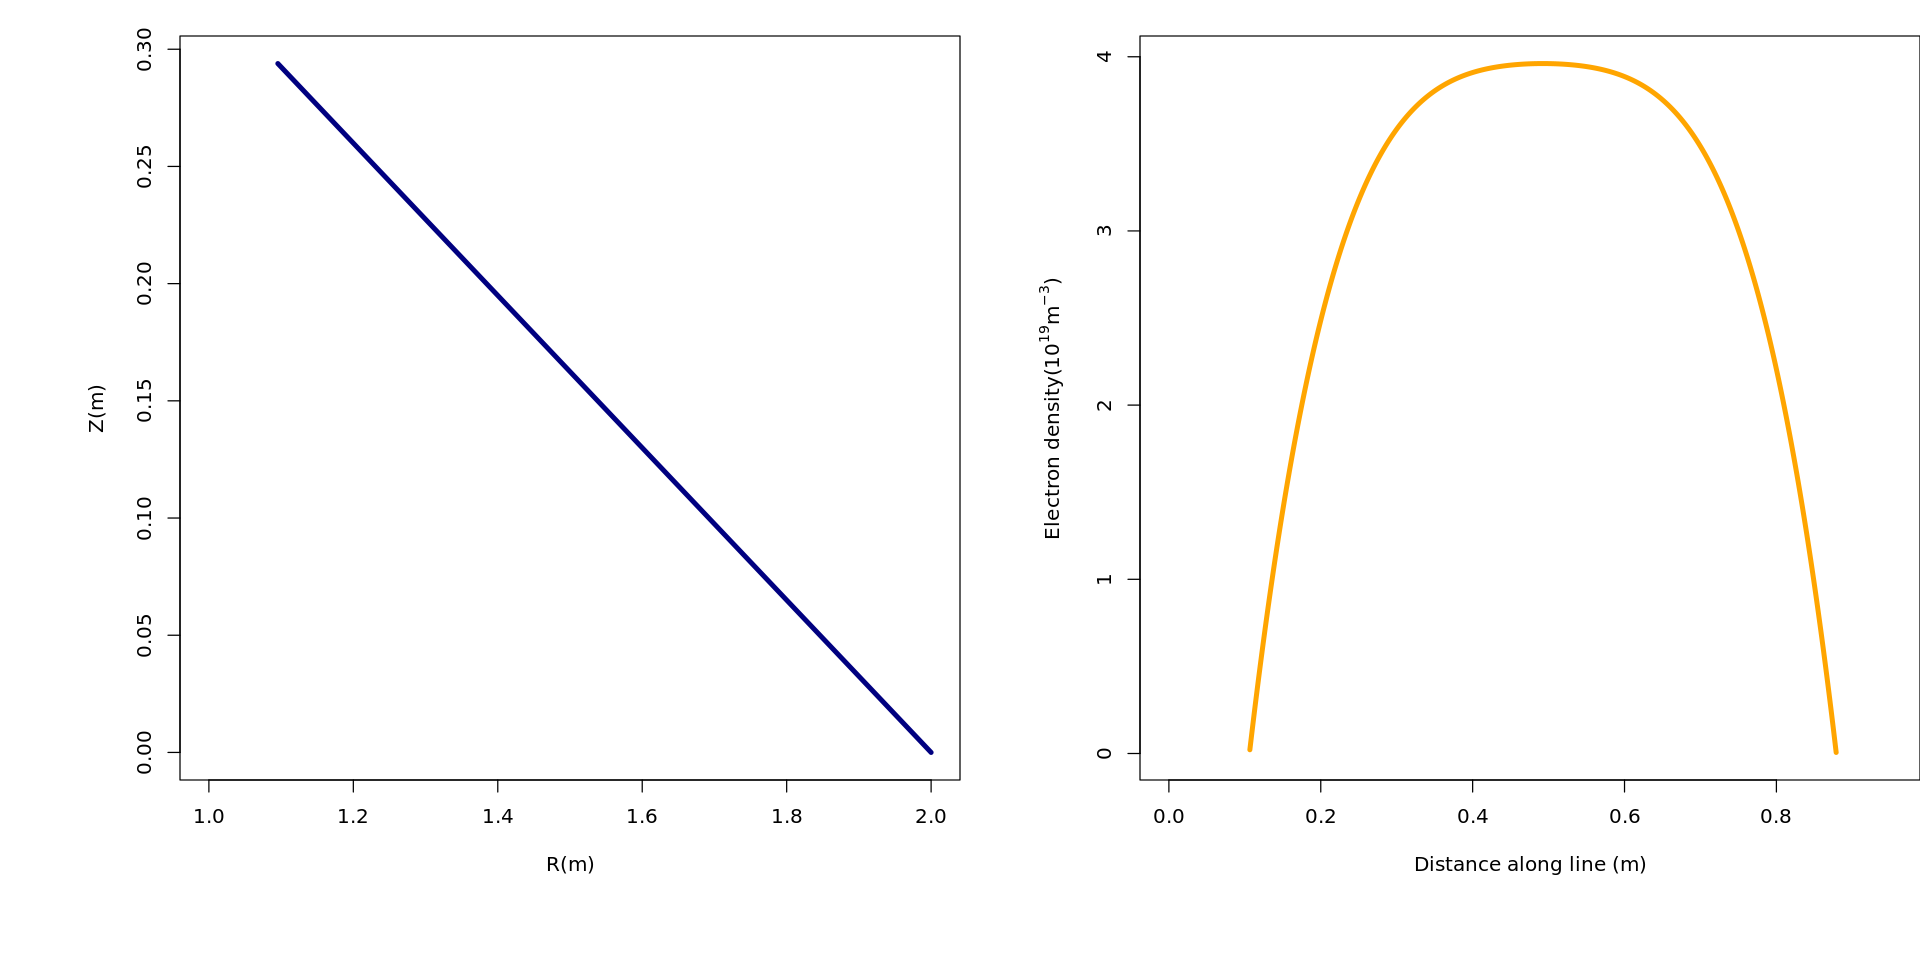

In [123]:
end_angles <-  seq(0, 2*pi, length.out=6)
start_angles <-  rep(0, length(end_angles))
n_line <-3 

x_start <-  1.5 + 0.5 * cos(start_angles[n_line])
x_end   <-  1.5 + 0.5 * cos(end_angles[n_line])
y_start <-  0.5 * sin(start_angles[n_line])
y_end   <-  0.5 * sin(end_angles[n_line]) 
path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


line_dist= seq(0, path_len, length.out=1000)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1
Z_line <- RZ[2]$v2

rho_line = get_rho(R_line, Z_line)
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)

par(mfrow=c(1,2), mai=c(1.5, 1.5, 0.3, 0))
options(repr.plot.width=16, repr.plot.height=8)  #to set graph size

plot(R_line, Z_line, xlab='R(m)', ylab='Z(m)',type='l', lwd=4, xlim=c(1,2), col= 'navy')
plot(line_dist, map_profile_to_1d(rho_1d, dens_1d, rho_line), col='orange',
     xlab='Distance along line (m)', ylab=expression(paste("Electron density(", 10^19, m^-3, ')')), type='l', lwd=4)

## Curve fitting to get the LID (Line Integrated density)

In [4]:
e_density_cf <- e_density[!is.na(e_density)]## mask out na values where there is no plamsa from the model 
line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.765625,4.938941e-07,-11673809,0
"poly(x, 4, raw = TRUE)1",74.301287,5.416720e-06,13717026,0
"poly(x, 4, raw = TRUE)2",-216.768740,1.961702e-05,-11050036,0
"poly(x, 4, raw = TRUE)3",286.988136,2.857150e-05,10044559,0
"poly(x, 4, raw = TRUE)4",-145.691847,1.442815e-05,-10097748,0


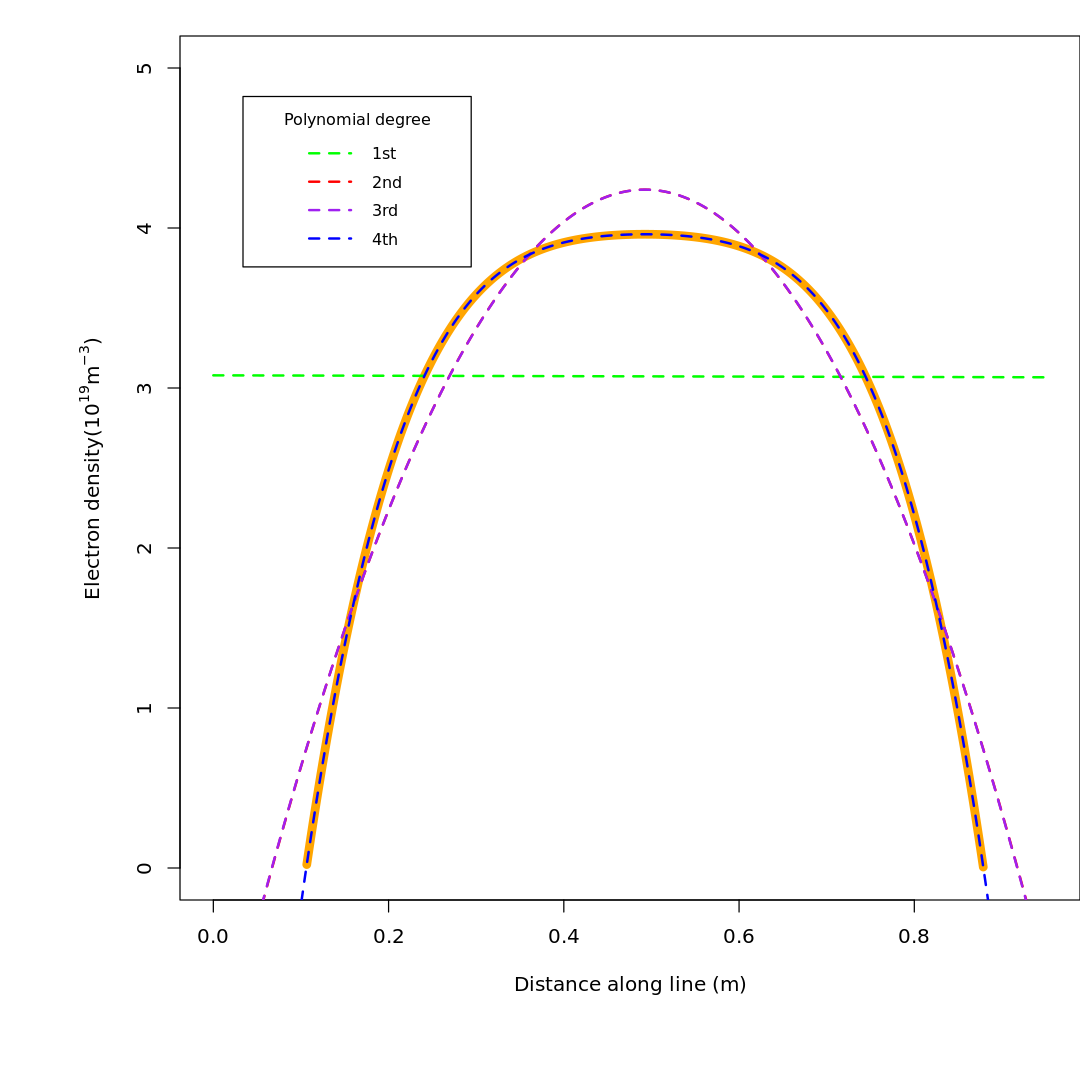

In [124]:
df <- data.frame(x=line_dist, y=e_density)
  
# create the linear models
linear_model1 <- lm(y~x, data=df)
linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
linear_model3 <- lm(y~poly(x,3,raw=TRUE), data=df)
linear_model4 <- lm(y~poly(x,4,raw=TRUE), data=df)
linear_model5 <- lm(y~poly(x,5,raw=TRUE), data=df)

par(mai=c(1.5, 1.5, 0.3, 0))
options(repr.plot.width=9, repr.plot.height=9)  #to set graph size
plot(line_dist, e_density, type='l', lwd=7, col='orange', ylim=c(0,5), 
     xlab= 'Distance along line (m)', ylab=expression(paste("Electron density(", 10^19, m^-3, ')')))

# define x-axis values
x_axis <- df$x
# add curve of each model to plot
lines(x_axis, predict(linear_model1, data.frame(x=x_axis)), col='green', lty=2, lwd=2)
lines(x_axis, predict(linear_model2, data.frame(x=x_axis)), col='red', lty=2, lwd=2)
lines(x_axis, predict(linear_model3, data.frame(x=x_axis)), col='purple',lty=2, lwd=2)
lines(x_axis, predict(linear_model4, data.frame(x=x_axis)), col='blue',lty=2, lwd=2)

legend("topleft", 
       title='Polynomial degree',
       inset=0.07, 
       legend=c('1st', "2nd","3rd", "4th"),
       col=c('green','red', 'purple', 'blue'), 
       lty=2,
       lwd=2,
       cex=0.8,
       box.lty=1)


summary(linear_model4)$coefficients

The plot above shows that the 4th degree polynomial is fits the model very well for a given line through the plasma therefore the line integrated density is given by

$$LID\approx \int^{x2}_{x1}(ax^4 +bx^3 +cx^2 +dx + e) dx = \left[\frac{ax^5}{5}+\frac{bx^4}{4}+\frac{cx^3}{3}+\frac{dx^2}{2}+ex\right]^{x2}_{x1} $$

In [6]:
e <-summary(linear_model4)$coefficients[, 1][[1]]
d <-summary(linear_model4)$coefficients[, 1][[2]]
c <-summary(linear_model4)$coefficients[, 1][[3]]
b <-summary(linear_model4)$coefficients[, 1][[4]]
a <-summary(linear_model4)$coefficients[, 1][[5]]

### Trivial anaytical integration of  a polynomial
calcLIDphi <- function(a,b,c,d,e,lower,upper){
    x2 <- upper; x1 <- lower
    return(((a/5)*x2^5+(b/4)*x2^4+(c/3)*x2^3+(d/2)*x2^2+e*x2) - ((a/5)*x1^5+(b/4)*x1^4+(c/3)*x1^3+(d/2)*x1^2+e*x1))
}

LID <- calcLIDphi(a,b,c,d,e, line_cf[1], line_cf[length(line_cf)])
cat('In this case (start angle =', paste(start_angles[n_line]), ', end angle =', paste(end_angles[n_line]),')\n
Line Integrated density = ', paste(LID))

In this case (start angle = 0 , end angle = 2.51327412287183 )

Line Integrated density =  2.37535486441916

<a id ='design'></a> 
## Section 3: Bayesian Experimental Design

In [11]:
getDensProfile <- function(start_angle, end_angle){
    x_start <-  1.5 + 0.5 * cos(start_angle)
    x_end   <-  1.5 + 0.5 * cos(end_angle)
    y_start <-  0.5 * sin(start_angle)
    y_end   <-  0.5 * sin(end_angle) 
    path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)

    line_dist= seq(0, path_len, length.out=1000)
    RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
    R_line <- RZ[1]$v1
    Z_line <- RZ[2]$v2

    rho_line = get_rho(R_line, Z_line)
    rho_1d = seq(0, 1, length.out=101)
    dens_1d = (1 - rho_1d^2) * 4.0##
    e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    e_density_cf <- e_density[!is.na(e_density)]## mask out na values
    line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
    dens <- data.frame(x=line_cf, y=e_density_cf)
    return(dens)
}

LIDtrue <- function(start_angle, end_angle){
    dens <- getDensProfile(start_angle, end_angle)
    linear_model <- lm(y~poly(x,4,raw=TRUE), data=dens)
    e <-summary(linear_model)$coefficients[, 1][[1]]
    d <-summary(linear_model)$coefficients[, 1][[2]]
    c <-summary(linear_model)$coefficients[, 1][[3]]
    b <-summary(linear_model)$coefficients[, 1][[4]]
    a <-summary(linear_model)$coefficients[, 1][[5]]
    fittedDens <- function(x){
        return(a*x^4 + b*x^3 + c*x^2 + d*x + e)
    }
    lo <- dens$x[1]
    up <- tail(dens$x,n=1)
    LIDt <- calcLIDphi(a,b,c,d,e,lo,up)
    return(LIDt)
}

<a id ='EU'></a>
### Expected Utility for diffrent angles through the plasma

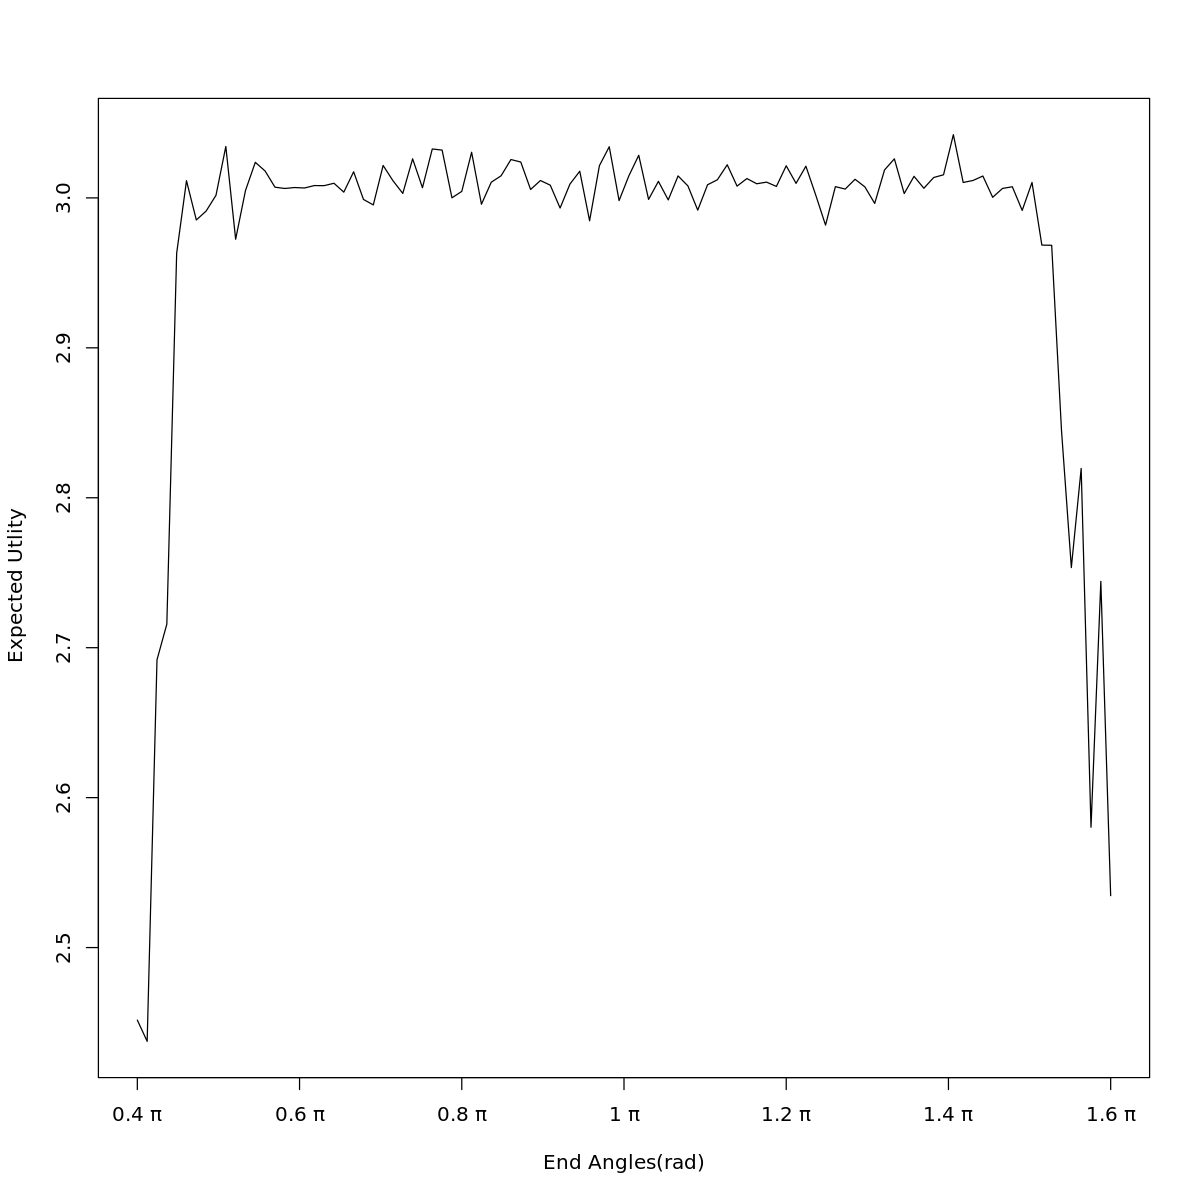

In [47]:
expected_utility <-function(eta, error=0.3){
    exp_er <- error
    n <- 100 # mc samples used
    LIDt <- LIDtrue(eta[1],eta[2])
    phi <- seq(0,10,length.out=100)

    utility <- function(Dj){
        lower_prior <- 0; upper_prior <- 6
        
        likelihood <- function(phi){
            dnorm(phi,mean=Dj,sd=exp_er)
        }
        
        likelihood_sample <- function(n){
            rnorm(n,mean=Dj,sd=exp_er)
        }
        ## get normalisation constant 
        normC <- 1/integrate(likelihood,lower=lower_prior,upper=upper_prior)$value
        pos <- function(phi){##postior
            normC*likelihood(phi)
        } 

        phi <- likelihood_sample(n)

        u_i <- function(phi){
            if(phi<0 || phi>10){return(0)}
            else{
                post <- pos(phi)
                return(log2(post*10))
            }
        }

        return(mean(u_i(phi)))

    }

    expu_n <- vector()
    D <- rnorm(n,mean=LIDt,sd=exp_er)# measurement sampled from a guassian
    for(Dj in D){

        eu_i <- utility(Dj)
        expu_n<-c(expu_n,eu_i)
    }

    return(mean(expu_n))
}   

end_angles <- seq(0.4*pi,(2*pi-0.4*pi),length.out=100)
expus <- vector()

for(ea in end_angles){
    eta <- c(0,ea) #start and end angle
    expus <- c(expus,expected_utility(eta))
}

breaks_pi <- pretty(range(end_angles/pi))
plot(end_angles,expus, xlab='End Angles(rad)' , ylab = ' Expected Utlity', type='l', xaxt="none")
axis(1, at = breaks_pi * pi, labels = paste(breaks_pi, "\u03c0"))            

<a id = 'EU_error'></a>
## Expected utility with error

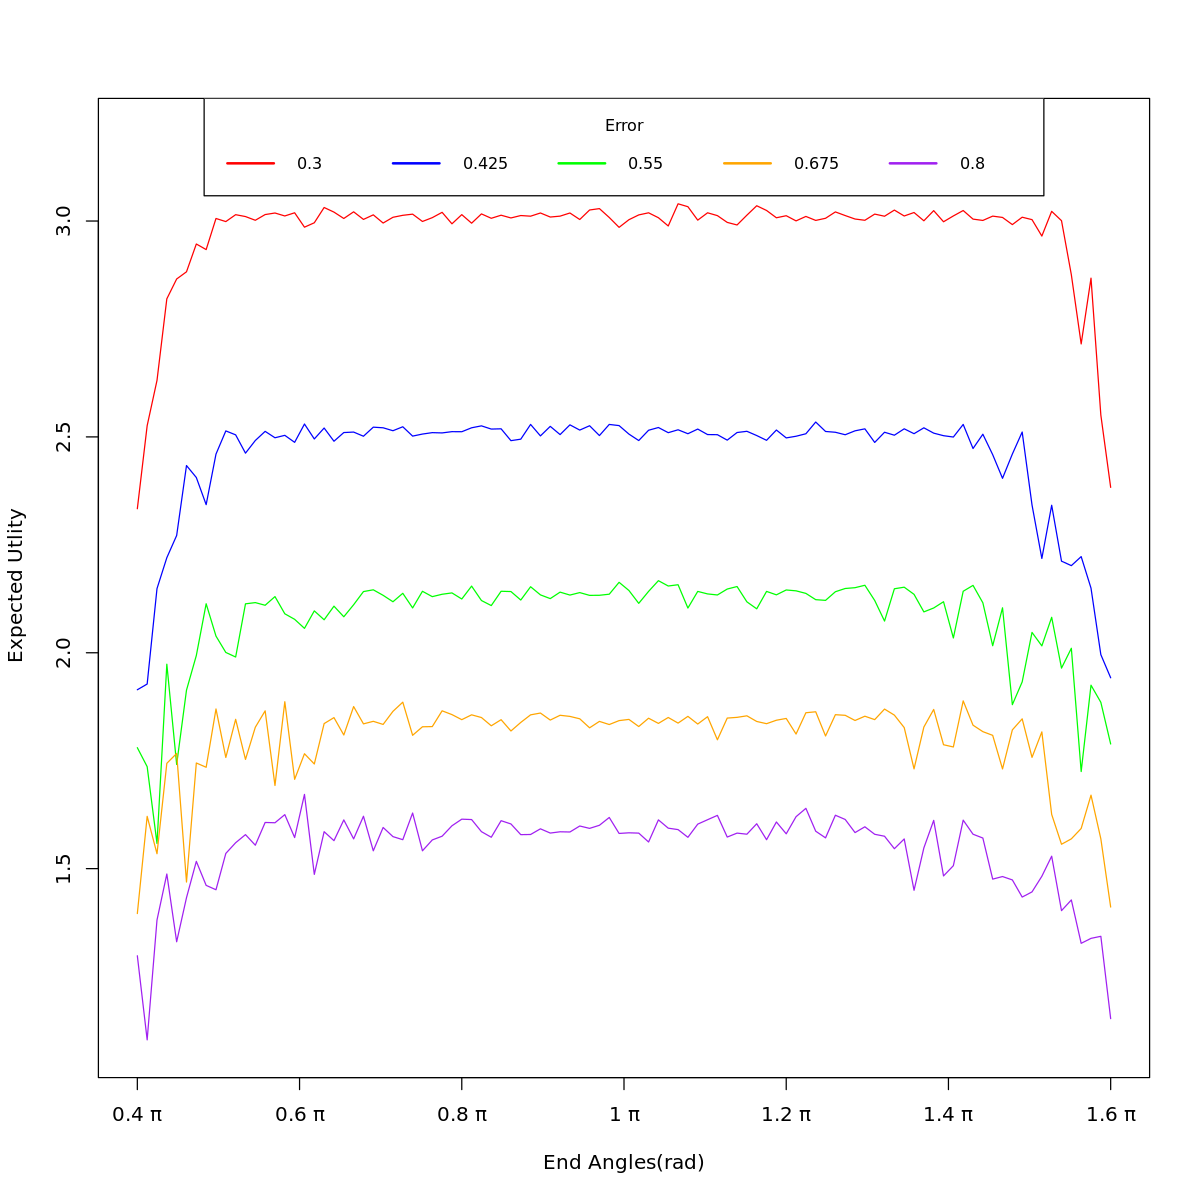

In [72]:
error <- seq(0.3,0.8, length.out=5)
colours <- c('red','blue','green', 'orange', 'purple')
i<-0
for (err in error){
    i<-i+1
    expus <- vector()
    for(ea in end_angles){
        eta <- c(0,ea) #start and end angle
        expus <- c(expus,expected_utility(eta, err))
    }
    if (i==1){
        breaks_pi <- pretty(range(end_angles/pi))
        plot(end_angles,expus, xlab='End Angles(rad)' , ylab = ' Expected Utlity', type='l', xaxt="none", col=colours[i], ylim=c(1.1,3.2))
        axis(1, at = breaks_pi * pi, labels = paste(breaks_pi, "\u03c0"))}
    else{
        lines(end_angles,expus, type='l', col=colours[i])
    }
    }

legend("top", 
       title='Error',
       ncol=5,
       legend=error,
       col=colours, 
       lwd=2,
       cex=0.8,
       box.lty=1)

We get the anticipated result that with a higher accuracy we get a larger expected utility and therefore information gain between our prior and posterior distributions. The data points sampled on the edges of the angle range are outside the range of the prior so cannot contribute to information gain, this helps explain the edges. This is explained futher in the methodology. The centeral region does seem to platau suggesting that there is maximum information gain that can be infered from a single line crossing the plasma. 

## Apendix 

### Find coefficents ($\phi_1, \phi_2, \phi_3$)

In [361]:
end_angles <-  seq(0.001, pi, length.out=2000) 
start_angles <-  rep(0, length(end_angles)) ## want them to all start in one place end in other 
n_line <-2 
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##
start <-TRUE
for ( nl in 1:length(end_angles)){
    
    ##create the lines which go through the plasma
    x_start <-  1.5 + 0.5 * cos(start_angles[nl])
    x_end   <-  1.5 + 0.5 * cos(end_angles[nl])
    y_start <-  0.5 * sin(start_angles[nl])
    y_end   <-  0.5 * sin(end_angles[nl]) 
    path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)   
    line_dist= seq(0, path_len, length.out=1000)
    RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
    R_line <- RZ[1]$v1; Z_line <- RZ[2]$v2
    
    ### calculate the properties along the line
    rho_line <- get_rho(R_line, Z_line)
    e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    e_density_cf <- e_density[!is.na(e_density)]## mask out na values
    line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
    
    ### Curve fit the line 
    if (length(e_density_cf)>0){#only curve fit if its not just NaN values
        df <- data.frame(x=line_cf, y=e_density_cf)
        x_axis <- df$x#seq(1, 10, length=10)
        
        linear_model <- lm(y~poly(x,2,raw=TRUE), data=df)
        p<-predict(linear_model, data.frame(x=x_axis))
        c_ <-summary(linear_model)$coefficients[, 1][[1]]
        b_ <-summary(linear_model)$coefficients[, 1][[2]]
        a_ <-summary(linear_model)$coefficients[, 1][[3]]
    
        if (start){
            a<-a_;b<-b_;c<-c_;#d<-d_;e<-e_
            start <- FALSE
        }
        
        if (sum(c(a_,b_,c_))!=0){
            a <- c(a, a_);b <- c(b, b_);c <- c(c, c_)#;d <- c(d, d_);e <- c(e, e_)
        }
    }
    
}

a_min <- a[which.min(a)]; a_max<-a[which.max(a)]
b_min <- b[which.min(b)]; b_max<-b[which.max(b)]
c_min <- c[which.min(c)]; c_max<-c[which.max(c)]


cat('a_range:',a[which.min(a)], ' to ', a[which.max(a)], '\n',
    'b_range:',b[which.min(b)], ' to ', b[which.max(b)], '\n',
    'c_range:',c[which.min(c)], ' to ', c[which.max(c)], '\n')

Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”
Warning message in min(xi):
“no non-missing arguments to min; returnin

[1] "ranges"

a_range: -36.75478  to  -21.43015 
 b_range: 21.42167  to  27.53127 
 c_range: -4.49775  to  -1.011661 


a_range: -36.75478  to  -21.43015   
b_range: 21.42167  to  27.53127   
c_range: -4.49775  to  -1.011661

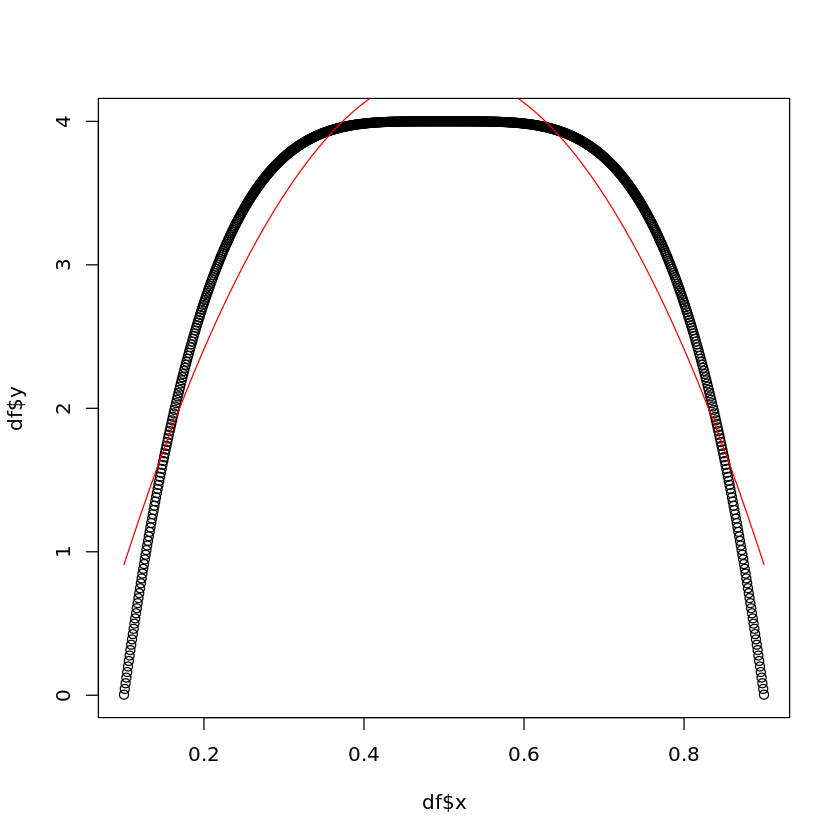

In [360]:
#inspect basic fit
plot(df$x,df$y)
x<-df$x
y<-a[length(a)]*x^2+ b[length(a)]*x+c[length(a)]
lines(x, y, col='red')

[1] NA

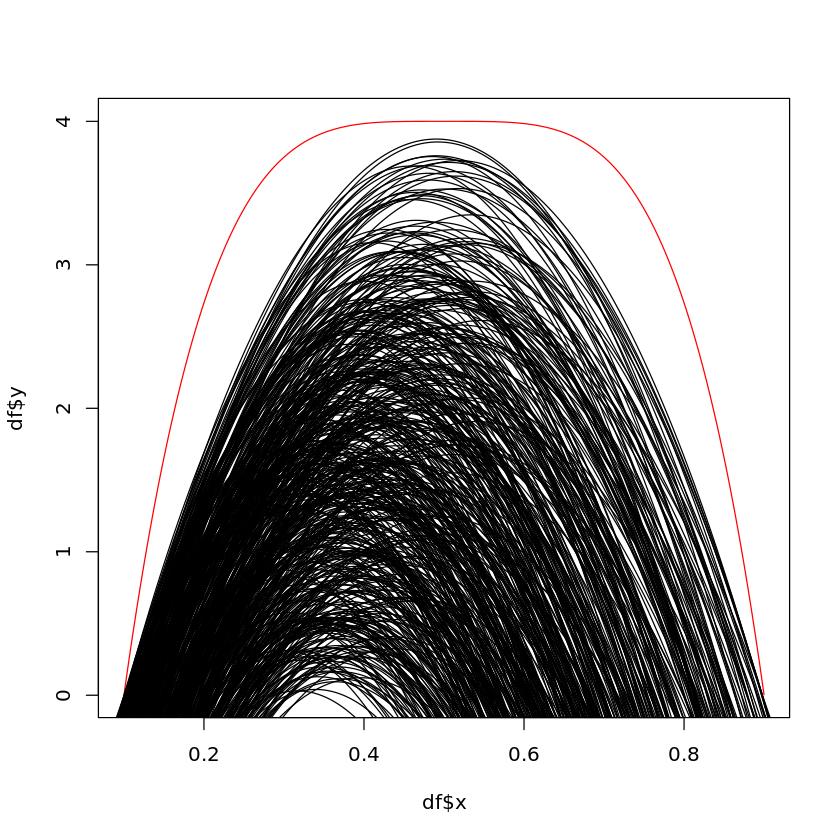

In [428]:
### Test the roots as we keep the fact the plasma is bound in the prior
root_check <- function(a, b, c, min, max) {
  in_range <- FALSE 
  discriminant <- (b^2) - (4*a*c)
  if(discriminant < 0) {
    return(FALSE)
  }
  else if(discriminant > 0) {
    x_plus <- (-b + sqrt(discriminant)) / (2*a)
    x_neg <- (-b - sqrt(discriminant)) / (2*a)
    x_<- sort(c(x_neg, x_plus))## check our range
    if (min < x_[1] &  x_[2]< max){
        return(TRUE)
    }
    return(FALSE)
  }
  else #discriminant = 0  case
    x_int <- (-b) / (2*a)
    return(FALSE)# WE CANT USE IT NO AREA
}

root_value <- function(a, b, c, min, max) {
  in_range <- FALSE 
  discriminant <- (b^2) - (4*a*c)
  if(discriminant < 0) {
    return(NaN)
  }
  else if(discriminant > 0) {
    x_plus <- (-b + sqrt(discriminant)) / (2*a)
    x_neg <- (-b - sqrt(discriminant)) / (2*a)
    x_<- sort(c(x_neg, x_plus))## check our range
    if (min < x_[1] &  x_[2]< max){
        return(x_)
    }
    return(FALSE)
  }
  else #discriminant = 0  case
    x_int <- (-b) / (2*a)
    return(FALSE)# WE CANT USE IT NO AREA
}


### calculate lid (quadratic analytical solution)
get_lid <-function(a, b, c, x1, x2){#x1 lower, x2 upper 
    rv<-root_value(a, b, c, x1, x2)
    x1<-rv[1];x2<-rv[2]
    (a/3)*x2^3+(b/2)*x2^2+c*x2 - ((a/3)*x1^3+(b/2)*x1^2+c*x1)
}

###test lid
get_lid(a1, b1, c1, 0, line_cf[length(line_cf)])

###prior
x<-seq(0,1,0.001)
plot(df$x, df$y , type='l', col='red')
a_sample <- runif(1000, min=a_min, max=a_max)
b_sample <- runif(1000, min=b_min, max=b_max)
c_sample <- runif(1000, min=c_min, max=c_max)

for (i in 1:length(a_sample)){
    if (root_check(a_sample[i], b_sample[i], c_sample[i], 0.1, 0.9)){
        lines(x, parab_dens(x, a_sample[i], b_sample[i], c_sample[i]))
    }
}

In [425]:
gen_phi <- function(N){
    gen_mask <- function(a, b, c, min, max){
        mask <- root_check(a, b, c, min, max)
        for (i in 2:length(a)){
            mask<-c(mask, root_check(a[i], b[i], c[i], 0.1, 0.9))
        }
        return(mask)
    }
    ## oversample by factor of 2 here
    a_sample <- runif(2*N, min=a_min, max=a_max)
    b_sample <- runif(2*N, min=b_min, max=b_max)
    c_sample <- runif(2*N, min=c_min, max=c_max)
    
    ##check the bounds on the roots
    mask<- gen_mask(a_sample, b_sample, c_sample, 0.1,0.9)
    
    ##remove the physically impossible plasmas
    a_correct<-a_sample[mask]; b_correct<-b_sample[mask]; c_correct<-c_sample[mask]
    return(list(a= a_correct[1:N] ,b= b_correct[1:N],c= c_correct[1:N]))
}

bulk_lid <- function(a, b, c, min, max){
    lid <- get_lid(a[1], b[1], c[1], min, max)
    for (i in 2:length(a)){
        lid<-c(lid, get_lid(a[i], b[i], c[i], min, max))
    }
    return(lid)
}

phi <- gen_phi(1000)
a_samp<-phi$a;b_samp<-phi$b;c_samp<-phi$c

Warning message in if (discriminant < 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (discriminant > 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in sqrt(discriminant):
“NaNs produced”
Warning message in sqrt(discriminant):
“NaNs produced”


In [432]:
n<-1000

##perfect maesurement
pos<-angle_to_position(0, pi)
x1 <- pos$x1; y1 <- pos$y1
x2 <- pos$x2; y2 <- pos$y2
pl<-path_length(x1,y1,x2,y2)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1; Z_line <- RZ[2]$v2
rho_line <- get_rho(R_line, Z_line)
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values



x <-seq(0, pl, length.out=n)
phi <- gen_phi(1000)
a_samp<-phi$a;b_samp<-phi$b;c_samp<-phi$c
lid <- bulk_lid(a_samp, b_samp, c_samp, 0, 1)

Warning message in if (discriminant < 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (discriminant > 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in sqrt(discriminant):
“NaNs produced”
Warning message in sqrt(discriminant):
“NaNs produced”


[1] 0.6730005